In [1]:
# Simple Linear Regression
from random import seed
from random import randrange
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### USER DEFINED FUNCTION

In [3]:
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

In [4]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

In [5]:
# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

In [6]:
# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

In [7]:
# Simple linear regression algorithm
def simple_linear_regression(train):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in train:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions

In [8]:
# Evaluate an algorithm using a train/test split
def evaluate_algorithm(dataset):
    predicted = simple_linear_regression(dataset)
    actual = [row[-1] for row in dataset]
    return (mean_squared_error(actual,predicted),r2_score(actual,predicted),predicted,actual)

In [9]:
# load and prepare data
filename = 'C:\\Users\\verma\\Desktop\\GPR\\housing.csv'
data = pd.read_csv(filename)

RMSE: 14019945196.250
R2: 0.486


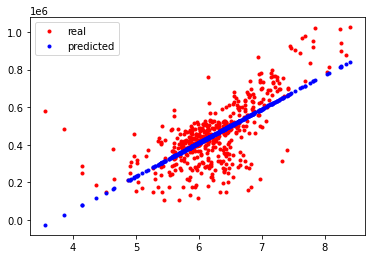

In [11]:
dataset=np.array(data[['RM','MEDV']])
(mse,r2,predicted,actual) = evaluate_algorithm(dataset)
print('RMSE: %.3f' % (mse))
print('R2: %.3f' % (r2))
# Plot the data points
plt.plot(data['RM'],actual, 'r.',label='real')
# Plot the estimate
plt.plot(data['RM'], predicted, 'b.',label='predicted')
plt.legend()

RMSE: 11495908520.487
R2: 0.579


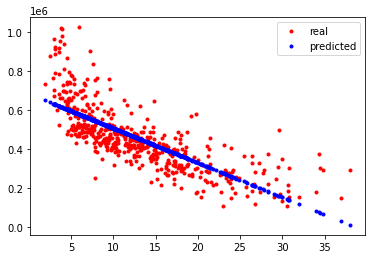

In [34]:
dataset=np.array(data[['LSTAT','MEDV']])
(mse,r2,predicted,actual) = evaluate_algorithm(dataset)
print('RMSE: %.3f' % (mse))
print('R2: %.3f' % (r2))
# Plot the data points
plt.plot(data['LSTAT'],actual, 'r.',label='real')
# Plot the estimate
plt.plot(data['LSTAT'], predicted, 'b.',label='predicted')
plt.legend()

RMSE: 19931981057.697
R2: 0.269


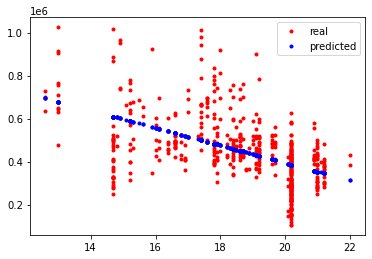

In [35]:
dataset=np.array(data[['PTRATIO','MEDV']])
(mse,r2,predicted,actual) = evaluate_algorithm(dataset)
print('RMSE: %.3f' % (mse))
print('R2: %.3f' % (r2))
plt.plot(data['PTRATIO'],actual, 'r.',label='real')
# Plot the estimate
plt.plot(data['PTRATIO'], predicted, 'b.',label='predicted')
plt.legend()

### SKLEARN CUSTOM FUNCTION

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
X=data[['RM','LSTAT','PTRATIO']]
y=data['MEDV']
reg = LinearRegression().fit(X, y)

In [23]:
y_pred=reg.predict(X)

In [33]:
mean_squared_error(y,y_pred),r2_score(y,y_pred)
print('RMSE: %.3f' % (mse))
print('R2: %.3f' % (r2))

RMSE: 19931981057.697
R2: 0.269


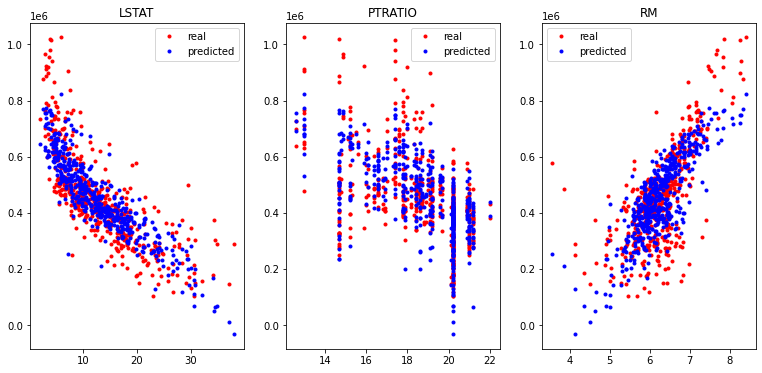

<Figure size 432x288 with 0 Axes>

In [32]:
fig = plt.figure(figsize=(13,6))

plt.subplot(1, 3, 1)
plt.title('LSTAT')
plt.plot(data['LSTAT'],y,'r.',label='real')
plt.plot(data['LSTAT'],y_pred,'b.',label='predicted')
plt.legend()

plt.subplot(1, 3, 2)
plt.title('PTRATIO')
plt.plot(data['PTRATIO'], y, 'r.',label='real')
plt.plot(data['PTRATIO'],y_pred,'b.',label='predicted')
plt.legend()

plt.subplot(1, 3, 3)
plt.title('RM')
plt.plot(data['RM'],y,'r.',label='real')
plt.plot(data['RM'],y_pred ,'b.',label='predicted')
plt.legend()

plt.show()
plt.tight_layout()